Note: I am not sure if it is needed to have these commands:

! pip install pandas

! pip install numpy

! pip install seaborn

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler

In [90]:
# Load the CSV file into a DataFrame
training_dataset = pd.read_csv('./dataset/customer_churn_dataset-training-master.csv')
testing_dataset = pd.read_csv('./dataset/customer_churn_dataset-testing-master.csv')
# Display the first 5 rows of the DataFrame
# print(df1.head())
# print(df1.columns)
df = pd.concat([training_dataset, testing_dataset], ignore_index=True)

df.head(50)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [91]:
#List of the columns
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [92]:
#Inspect the churn column
df['Churn']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
505202    1.0
505203    1.0
505204    1.0
505205    1.0
505206    1.0
Name: Churn, Length: 505207, dtype: float64

In [93]:
#Print the shape to understand the size of the dataset and print the data types of all the features
print(df.shape)
print(df.dtypes)

(505207, 12)
CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object


Gender, Subscription Type, and Contract Length are objects so these will need to be converted to be a numerical value

In [94]:
#Check for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [95]:
row_nan_count = np.sum(df.isnull(), axis=1)
row_nan_count

0         0
1         0
2         0
3         0
4         0
         ..
505202    0
505203    0
505204    0
505205    0
505206    0
Length: 505207, dtype: int64

After looking through the dataset, row 199295 has missing values for all the columns. Therefore, we can remove this row.

In [96]:
df.iloc[199295]

CustomerID           NaN
Age                  NaN
Gender               NaN
Tenure               NaN
Usage Frequency      NaN
Support Calls        NaN
Payment Delay        NaN
Subscription Type    NaN
Contract Length      NaN
Total Spend          NaN
Last Interaction     NaN
Churn                NaN
Name: 199295, dtype: object

In [97]:
#Drop row 199295
df.drop(199295, inplace=True)

In [98]:
#Ensure that row 199295 was removed
df.iloc[199295]

CustomerID           204107.0
Age                      36.0
Gender                 Female
Tenure                   46.0
Usage Frequency          24.0
Support Calls             7.0
Payment Delay             1.0
Subscription Type       Basic
Contract Length       Monthly
Total Spend             118.9
Last Interaction         27.0
Churn                     1.0
Name: 199296, dtype: object

In [99]:
#Recheck for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [100]:
df.drop(columns=["CustomerID"],inplace=True)

In [101]:
#List the different values for the columns with object type
print(df['Gender'].unique())
print(df['Subscription Type'].unique())
print(df['Contract Length'].unique())


['Female' 'Male']
['Standard' 'Basic' 'Premium']
['Annual' 'Monthly' 'Quarterly']


In [102]:
#Perform one-hot encoding
df_gender = pd.get_dummies(df['Gender'], prefix='Gender')
df = df.join(df_gender)
df.drop(columns='Gender', inplace=True)

df_subscription_type = pd.get_dummies(df['Subscription Type'], prefix='Subscription Type')
df = df.join(df_subscription_type)
df.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df['Contract Length'], prefix='Contract Length')
df = df.join(df_contract_length)
df.drop(columns='Contract Length', inplace=True)

<Axes: xlabel='Age', ylabel='Churn'>

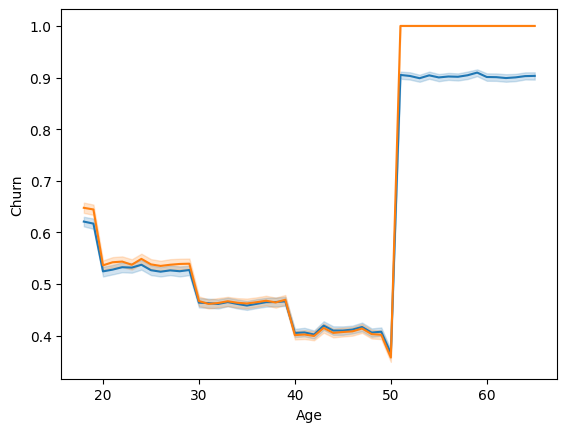

In [103]:
# sns.lineplot(x=df['Age'], y=df['Churn'])
# sns.lineplot(x=training_dataset['Age'], y=training_dataset['Churn'])

In [104]:
#Identifying correlations with the label
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['Churn']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted



Churn                         1.00000
Support Calls                 0.51628
Contract Length_Monthly       0.36650
Payment Delay                 0.32978
Age                           0.19122
Gender_Female                 0.16899
Last Interaction              0.12715
Subscription Type_Basic       0.01911
Subscription Type_Standard   -0.00793
Subscription Type_Premium    -0.01101
Tenure                       -0.02131
Usage Frequency              -0.05326
Contract Length_Annual       -0.15271
Contract Length_Quarterly    -0.15635
Gender_Male                  -0.16899
Total Spend                  -0.36968
Name: Churn, dtype: float64

In [105]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203,0.445230,0.554770,0.325564,0.336692,0.337743,0.393123,0.216217,0.390660
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944,0.496992,0.496992,0.468586,0.472579,0.472941,0.488444,0.411664,0.487899
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


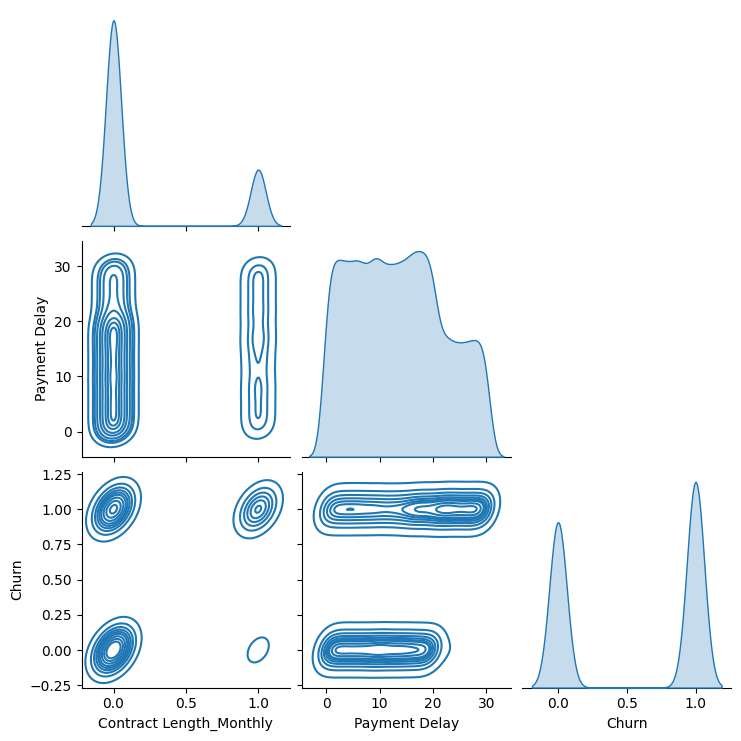

In [106]:
# #Visualize the top two correlated features
# df_sample = df.sample(n=30000)
# top_two_corr = list(corrs_sorted[2:4].index)
# df_corrs_sample = df_sample[top_two_corr].copy()
# df_corrs_sample['Churn'] = df_sample['Churn']
# sns.pairplot(data=df_corrs_sample, kind='kde', corner=True)
# #ASK TA about this

array([[<Axes: title={'center': 'Churn'}>]], dtype=object)

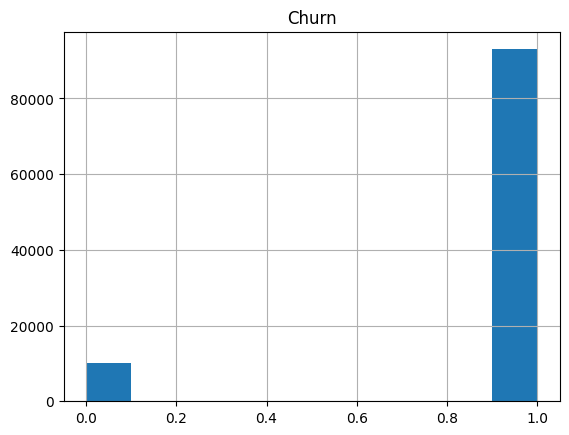

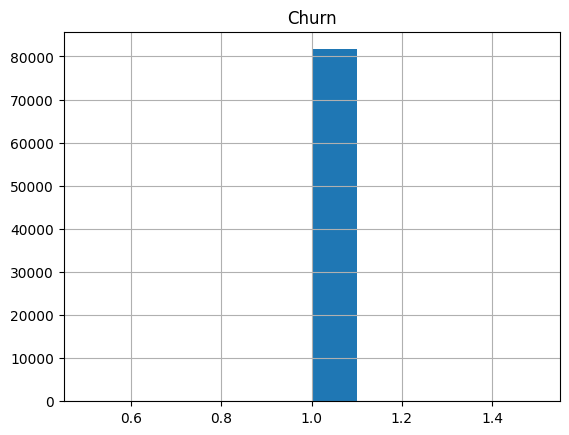

In [107]:
# filter_df = df[df['Age']>50]

# filter_df
# filter_df.hist(column='Churn')

# training_dataset[training_dataset['Age']>50].hist(column='Churn')

In [108]:
df[df['Age']>50].head(100)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,1,0,0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,1,0,0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,0,1,0,0,1,0,1,0
5,51.0,33.0,25.0,9.0,26.0,129.0,8.0,1.0,0,1,0,1,0,1,0,0
6,58.0,49.0,12.0,3.0,16.0,821.0,24.0,1.0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,54.0,56.0,7.0,7.0,4.0,206.0,20.0,1.0,0,1,0,0,1,1,0,0
265,64.0,25.0,20.0,0.0,23.0,141.0,12.0,1.0,0,1,0,0,1,1,0,0
268,63.0,44.0,15.0,0.0,3.0,752.0,26.0,1.0,0,1,0,1,0,0,0,1
270,54.0,3.0,17.0,4.0,27.0,401.0,21.0,1.0,0,1,0,0,1,1,0,0


In [109]:
#Normalize the numerical features by scaling values between 0 and 1
# scaler = MinMaxScaler()
# df = scaler.fit_transform(df)
# df_norm_test = pd.DataFrame(df_norm_test, columns=df_testing.columns)

In [110]:
from sklearn.model_selection import train_test_split
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1234)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [111]:
# Another way
model = LogisticRegression(C=1.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
acc_score = accuracy_score(y_test, predictions)
lg_loss = log_loss(y_test, probabilities)

print('Log loss=' + str(lg_loss) + ', accuracy score: ' + str(acc_score))

Log loss=0.39815714754993736, accuracy score: 0.8401654757427605


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


^Note: We had to use a sample because using the whole dataset was too large and causing no output